# Projeto: Estatísticas de distribuição de cartas

Esta experiência exigirá o uso de um baralho de cinquenta e duas cartas dividido em quatro naipes (espadas (♠), copas (♥), ouros (♦) e paus (♣)), cada naipe contendo treze cartas (Ás, cartas numeradas de 2-10, e cartas figuradas Valete, Dama e Rei). 
Atribua a cada carta um valor: o Ás tem valor de 1, as cartas numeradas recebem o valor impresso nelas e as figuradas, Valetes, Damas e Reis, têm valor de 10.

## Distribuição de Valores das Cartas: 
Criar um histograma representando as frequências relativas dos valores quando se distribui as cartas apenas um vez .

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import itertools 

def generate_cards():
    cards = np.concatenate((np.arange(1, 11), [10, 10, 10]))
    return np.repeat(cards, 4)

def generate_cards_distribution():
    cards = np.zeros((10,), dtype=int)
    
    for j in range (0, 13):
        value = j
        if j >= 10:
            value = 9
        cards[value] += 4
        
    return cards

def plot_bar_graph(x, y, label):
    sns.set(style="white", context="talk")

    f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)

    sns.barplot(x, y, palette="BuGn_d", ax=ax1)
    ax1.set_ylabel(label)

    sns.despine(bottom=True)
    plt.tight_layout(h_pad=3)

Histograma de distribuição das cartas por valor


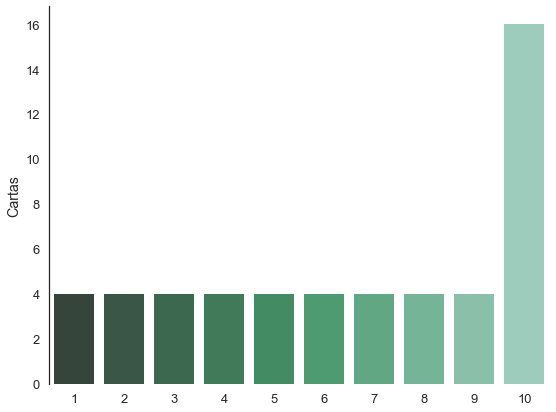

In [2]:
x = np.arange(1, 11)
y = generate_cards_distribution()
plot_bar_graph(x, y, "Cartas")
print("Histograma de distribuição das cartas por valor")

Qual é a média dos valores das cartas para uma única distribuição ?
Qual é a mediana para uma única distribuição?

In [4]:
allCards = generate_cards()

print("estatisticas descritivas básicas")
print("mediana: ", np.median(allCards))
print("media: ", np.average(allCards))
print("desvio: ", np.std(allCards))

estatisticas descritivas básicas
mediana:  7.0
media:  6.538461538461538
desvio:  3.1529079279875685


Histograma de do valor da soma de 3 cardas sorteadas aleatoriamentes (seed 850)


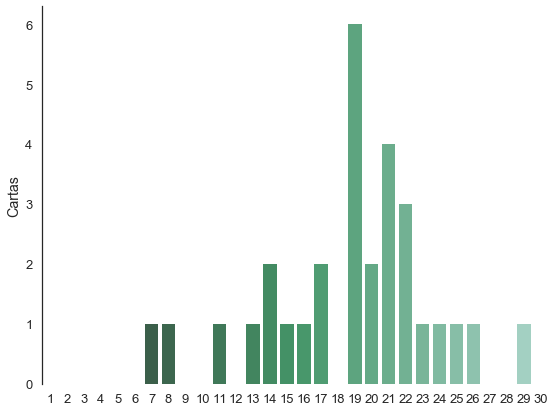

In [23]:
sum_3cards = []
with open('./dist_3cards.txt') as f:
    for line in f:    
        cards = line.rstrip().split(" ")
        sum = 0        
        for card in cards:
            card_value = card[:-1]
            if card_value == "A":
                sum += 1
            elif card_value == "J" or card[0] == "Q" or card[0] == "K":
                sum += 10
            else:
                sum += int(card_value)        
        sum_3cards.append(sum)

#cards_sum = np.array(sums)
sum_3cards.sort()
cards_sum = np.zeros((len(sum_3cards),), dtype=int)

for c_sum in sum_3cards:
    cards_sum[c_sum-1] += 1
    
x = np.arange(1, 31)
y = cards_sum
#print("sums", sums)
#print("x", x, len(x))
#print("y", y, len(y))
print("Histograma de do valor da soma de 3 cardas sorteadas aleatoriamentes (seed 850)")
plot_bar_graph(x, y, "Cartas")


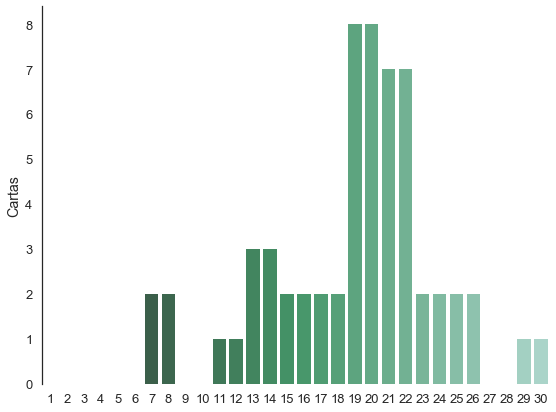

In [46]:
ny = []
for i in range(1, len(y), 2):
    #print(i, y[i], y[i-1])
    ny.append(y[i]+y[i-1])
    ny.append(y[i]+y[i-1])

#print("ny", ny, len(ny))
plot_bar_graph(x, ny, "Cartas")

Caluclar as estatisticas descritivas mais comuns:

In [30]:
print("estatisticas descritivas básicas:")
print("mediana: ", np.median(sum_3cards))
print("media: ", np.average(sum_3cards))
print("desvio: ", np.std(sum_3cards))
print("variancia:", np.var(sum_3cards))
print("interquartilho:", st.iqr(sum_3cards))

estatisticas descritivas básicas:
mediana:  19.0
media:  18.766666666666666
desvio:  4.8900124971437675
variancia: 23.912222222222223
interquartilho: 5.5


Qual a probabilidade de a soma das 3 cartas ser maior ou igual a 20?

In [26]:
sums_greater = len([i for i in sum_3cards if i >= 20])
print("probabilidade de a soma ser >= 20: ", sums_greater*100/30, "%")

probabilidade de a soma ser >= 20:  46.666666666666664 %


Dentro de qual intervalo você espera que aproximadamente 90% dos valores da sua distribuição das três cartas caiam?

In [45]:
mean = np.average(sum_3cards)
std_deviation = np.std(sum_3cards)

#pegando os limites entre 5% e 95% (range de 90% com maior probabilidade de acontecer)
#usando calculos de distribuição normal
limit_inferior = st.norm.ppf(.05, mean, std_deviation)
limit_superior = st.norm.ppf(.95, mean, std_deviation)
print("90% da distribuição deve cair no intervalo entre ", limit_inferior," e ", limit_superior)

90% da distribuição deve cair no intervalo entre  10.723311874901711  e  26.810021458431617
